# Building a ReWOO Reasoning Agent Using IBM Granite

[Large Language Models (LLMs)](https://www.ibm.com/think/topics/large-language-models) and their enhanced variants, Augmented Language Models (ALMs), have become the backbone of modern AI systems. By combining powerful language generation with external knowledge retrieval techniques like [Retrieval-Augmented Generation](https://www.ibm.com/think/topics/retrieval-augmented-generation) (RAG), they enable advanced reasoning, question answering, and task automation across diverse domains. However, despite their remarkable capabilities, these models often face challenges such as inconsistent robustness across systems, high token usage, slow response times, and inefficiencies caused by repetitive prompting and redundant context, when tackling complex tasks. Such limitations increase operational costs and hinder scalability and real-time performance. 

To overcome these issues, the ReWOO (Reasoning WithOut Observation) framework offers a novel approach that focuses on decoupling reasoning from external knowledge retrieval. Instead of having a single LLM try to reason, act, and observe in an interleaved manner, ReWOO separates these concerns into distinct modules, each potentially powered by an LLM but with a specific role. By modularizing the process into distinct planning, evidence gathering, and synthesis stages, ReWOO improves token efficiency and accuracy. It also makes the system easier to debug and enables more streamlined and effective AI [workflows](https://www.ibm.com/think/topics/agentic-workflows).

## The methodology behind ReWOO
ReWOO’s workflow revolves around three key components: step-wise reasoning, [tool calls](https://www.ibm.com/think/topics/tool-calling), and summarization. These are implemented in a modular structure consisting of three parts: the planner, worker, and solver. 

### Planner
The planner breaks down the main task into a sequence of focused sub-questions, creating a clear blueprint. Instead of asking the LLM to answer a complex question all at once which can lead to overwhelming token use and muddled responses, the planner creates a blueprint or roadmap. This stepwise breakdown guides the workflow and keeps the reasoning process structured.

### Worker

The worker calls external tools such as search engines or databases to retrieve relevant information and evidence needed to answer the sub-questions. It uses the LLM to formulate clear, concise answers based solely on this retrieved information. This external observation phase is kept separate from the reasoning process to avoid unnecessary repetition of prompts and to reduce token consumption. 

### Solver 

The solver synthesizes all the gathered insights to generate a fresh, well-structured final response. This modular separation ensures efficient, accurate, and scalable reasoning with large language models.

Frameworks like [LangChain](https://www.ibm.com/think/topics/langchain) and [LangGraph](https://www.ibm.com/think/topics/langgraph) provide powerful tools to implement ReWOO architecture using models from OpenAI, [IBM Granite](https://www.ibm.com/products/watsonx-ai/foundation-models) or specialized tools like Serper and Tavily for search.

In this tutorial, you will explore how to build a ReWOO agent that performs the task of content summarization. This [agent](https://www.ibm.com/think/topics/ai-agents) can:

•	Break down a high-level task into sub-questions

•	Use web search to gather relevant context for each sub-question

•	Generate answers using IBM Granite

•	Summarize the results into a final response

This architecture is helpful for:

•	Summarization tasks

•	Question answering over external knowledge

•	Dynamic, tool-augmented reasoning

## Technologies used

This step-by-step tutorial leverages cutting-edge AI technologies, including:

1. IBM Granite Instruct: A powerful LLM for general instruction-following, ideal for AI assistants in business and other domains.

2. Transformers: A widely-used Python library that provides tools to load, tokenize, and run language models like IBM Granite. It allows efficient processing of text inputs and generation of model outputs.

## Steps

### Step 1:  Set up your environment

This tutorial guides you through setting up your local development environment to run a ReWOO-style reasoning pipeline using using Jupyter Notebook. You’ll use IBM’s Granite language model and Serper.dev for live web search retrieval.

Note: No GPU is required, but execution may be slower on CPU-based systems. This step opens a notebook environment where you can copy the code from this tutorial. This tutorial is also available on GitHub.

### Step 2: Install required dependencies

These libraries are needed to run the ReWOO pipeline and interact with external tools:

`transformers`: Loads and runs the IBM Granite large language model.

`torch`: a deep learning framework required for running the model efficiently.

`accelerate`: Optimizes model performance across hardware (optional).

`requests`: Sends HTTP POST requests to external [API](https://www.ibm.com/think/topics/api)s (like Serper).

In [ ]:
!pip install transformers accelerate torch requests

### Step 3: Import required libraries

In this step, import the necessary Python libraries required to build the core components of the ReWOO pipeline.

`transformers.AutoTokenizer`: Loads the tokenizer that converts text into tokens compatible with the language model.

`transformers.AutoModelForCausalLM`: Loads the pre-trained language model IBM Granite for generating responses.

`transformers.pipeline`: Provides a high-level interface to quickly create a text generation pipeline using the tokenizer and model.

In [ ]:
import requests
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline


### Step 4: Load the IBM Granite model and create a text generation pipeline

In this step, we load the IBM Granite language model and initialize a text generation pipeline using Hugging Face’s transformers library. Explore the Granite 3.2 2B Instruct model on Hugging Face [here](https://huggingface.co/ibm-granite/granite-3.2-2b-instruct).

`model_id = "ibm-granite/granite-3.2-2b-instruct"`: Specifies the name of the IBM Granite model checkpoint hosted on Hugging Face. This model is optimized for instruction-following tasks.

`AutoTokenizer.from_pretrained(model_id)`: Loads the tokenizer associated with the specified model. It is responsible for converting input text into tokens and decoding output tokens back into text.

`AutoModelForCausalLM.from_pretrained(model_id)`: Loads the language model (Granite 3.2 2B instruct) for text generation tasks such as answering questions or summarization.

`pipeline("text-generation", model=model, tokenizer=tokenizer)`: Creates a high-level text generation pipeline that combines the model and tokenizer, making it easy to generate responses from prompts.

In [ ]:
model_id = "ibm-granite/granite-3.2-2b-instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)
generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

### Step 5: Set up the Serper API for web search retrieval

In this step, we define a function that acts as the Worker in the ReWOO architecture. This Worker uses a web search tool, Serper.dev, to retrieve relevant, up-to-date information from the internet to support [reasoning](https://www.ibm.com/think/topics/ai-reasoning) and answer generation. Serper.dev is a fast and lightweight API that provides Google Search results in a structured format, making it ideal for real-time information retrieval in AI workflows.

This allows the ReWOO system to "observe" the real world by querying external knowledge sources before the LLM makes final decisions.

To use Serper in the ReWOO pipeline:

1.	Visit https://serper.dev and create a free account.

2.	After signing up, navigate to the Dashboard and copy the API key.

3.	In the code, store the API key securely. For now, assign it directly as shown below:

`SERPER_API_KEY = "<YOUR_API_KEY>"`  # Replace this with your actual key

Note: Never upload your API key to public repositories. For production or team settings, use .env files or environment variables to keep it secure.


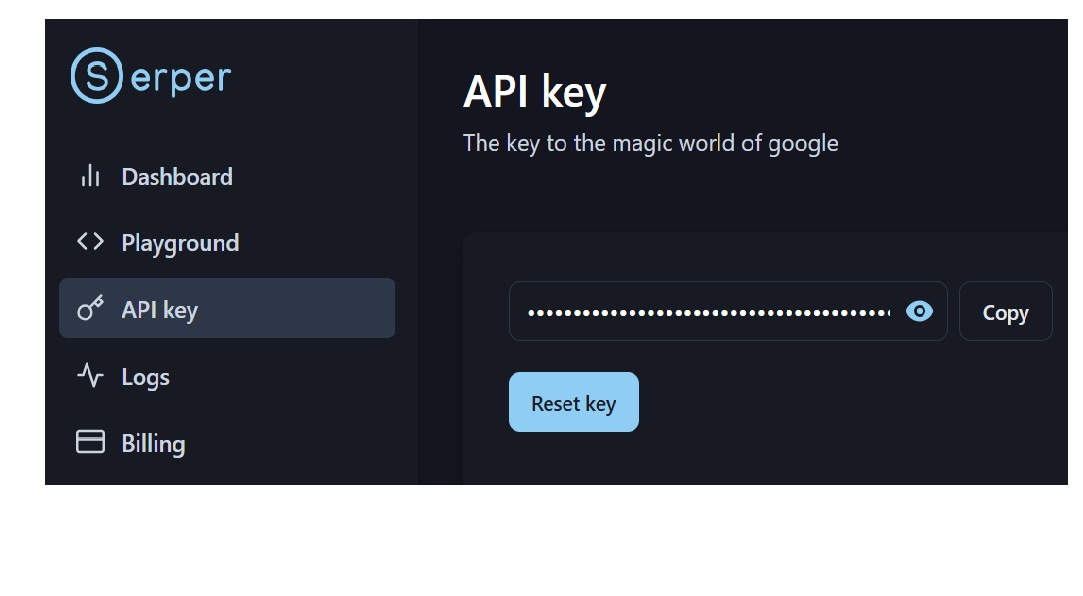

In [5]:
import os
from IPython.display import Image, display  # This Image is correct!

# Expand the path to your image
img_path = r"C:\Users\JobitVarughese\Desktop\ReWOO.jpg"

# Display the image
display(Image(filename=img_path))

`def query_serper(question, num_results=3)`: Defines a function that takes a search question and returns relevant snippets from the top search results.

`payload = {"q": question, "num": num_results}`: Prepares the query payload with the search term and number of results to return.

`response = requests.post(...)`: Sends a POST request to the Serper API with your query and headers.

`response.raise_for_status()`: Raises an error if the API response is invalid or fails.

`snippets = [...]`: Extracts snippet text from the organic search results.

`return "\n".join(snippets)`: Joins and returns the snippets as a single string, serving as context for the language model.

Note: This function forms the backbone of ReWOO’s “observation” step, where external evidence is gathered for further reasoning. Make sure your API key is valid and not rate-limited when testing.

In [ ]:
SERPER_API_KEY = "your_serper_api_key_here"  # Replace with your actual key
def query_serper(question, num_results=3):
    url = "https://google.serper.dev/search"
    headers = {
        "X-API-KEY": SERPER_API_KEY,
        "Content-Type": "application/json"
    }
    payload = {"q": question, "num": num_results}
    response = requests.post(url, headers=headers, json=payload)
    response.raise_for_status()
    data = response.json()
    snippets = [item.get("snippet", "") for item in data.get("organic", [])]
    return "\n".join(snippets)

### Step 6: Generate informed answers using the expert function

In this step, we define the expert() function, which serves as the solver in the ReWOO architecture. The solver synthesizes the retrieved external evidence and generates a final response using the language model.

`def expert(question: str) -> str`: The expert() function takes a question (string) and returns an answer (string) generated by the Granite model. It works by searching the web with Serper.dev, gathering relevant information, and using that to generate a clear, complete response.

`context = query_serper(question)`: Uses the Serper web search tool to retrieve relevant information (worker).

`prompt = f"""..."""`: Builds a prompt that instructs the model to answer using only the retrieved context. 

`generator(...)`: Calls the Granite model to generate an answer based on the input prompt. 

`for _ in range(5)`: This loop lets the model generate an answer in chunks, up to 5 times. It helps if the answer is long and can’t be completed in one go.

`generated_text += new_text`: Appends each new chunk of text to form the full answer.

`if new_text.endswith(...)`: If the answer seems complete (ends with a full stop, question mark, or exclamation mark), and has enough words (more than 50), it stops the loop.

`return generated_text.strip()`: Returns the final, cleaned-up answer.

Note: The prompt format is important; it makes sure the model doesn't “hallucinate” or go off-topic. It must stick to what’s in the context.
We limit each generation chunk to 120 tokens to control output length and manage resource usage efficiently while preventing excessive token usage.

In [ ]:
def expert(question: str) -> str:
    context = query_serper(question)  # your retrieval function

    prompt = f"""You are a knowledgeable expert. Based ONLY on the context below, answer the question clearly and concisely in your own words.  
Do NOT mention any sources or references.

Context:
{context}

Question: {question}
Answer:"""

    input_prompt = prompt
    generated_text = ""
    last_generated = ""

    for _ in range(5):  # up to 5 chunks
        outputs = generator(
            input_prompt,
            max_new_tokens=120,
            do_sample=False,
            eos_token_id=tokenizer.eos_token_id,
            # no invalid flags like 'temperature' here
        )
        
        text = outputs[0]["generated_text"]
        new_text = text[len(input_prompt):].strip()

        # Stop if no new content
        if new_text == last_generated:
            break

        generated_text += new_text + " "
        input_prompt = prompt + generated_text
        last_generated = new_text

        if new_text.endswith(('.', '!', '?')) and len(generated_text.split()) > 50:

            break

    return generated_text.strip()



### Step 7: Define the planner module

In this step, we define the Planner function, which breaks down a broad input task into smaller, well-defined sub-questions, a core principle of ReWOO's step-wise [reasoning](https://www.ibm.com/think/topics/agentic-reasoning).

`def planner(task: str)`: This defines a function named planner that accepts a single argument task (a string describing the task to perform).

`topic = task.replace("Summarize", "").replace("the novella", "").strip()`: Extract the main subject (e.g., the title or theme) from the task. It cleans the input by removing common prompt phrases like "Summarize" and "the novella", then trims leading/trailing whitespace to isolate the core topic.

`return [ ... ]`: Returns a list of specific questions that guide the Worker module. 

Note: You can extend this list with more specific sub-questions depending on the depth and nature of the input topic.

In [ ]:
def planner(task: str):
    topic = task.replace("Summarize", "").replace("the novella", "").strip()
    return [
        f"What is the main plot related to {topic}?",
        f"Who are the key characters in {topic}?",
        f"What themes are explored in {topic}?"
    ]


### Step 8: Define the final summarizer (solver module)

In this step, we define the final_summarizer function, which acts as the solver in the ReWOO pipeline. This function takes the sub-answers (evidence) provided by the worker and generates a newly written, coherent summary using the language model.

`def final_summarizer(task: str, sub_answers: dict) -> str`: Defines the function that receives the original task and sub-answers, and returns a concise summary.

`insights = "\n".join(sub_answers.values())`: Combines all answers into a single string separated by newlines for inclusion in the prompt.

`base_prompt = f"""..."""`: Constructs the base prompt instructing the model to summarize the provided insights. It guides the model to generate a fresh summary based only on sub-answers.

`max_total_tokens = 400`: Sets an upper limit for the generated token count to avoid excessively long outputs.

`max_loops = 5`: Allows up to 5 iterations of generation to progressively build the summary.

`for  in range(maxloops)`: Loops to generate text chunks using the language model.

`response = generator(..., max_new_tokens=100, ...)`: Uses the generator (pipeline object) to generate up to 100 new tokens in each loop. Sampling mode (do_sample=True) allows variation and creativity in the response.

`if summary.endswith(...) or total_tokens_used >= max_total_tokens`: Ends the loop if the summary concludes with proper punctuation or reaches the token cap.

`return summary.strip()`: Returns the final, polished summary with no trailing spaces.

In [ ]:
def final_summarizer(task: str, sub_answers: dict) -> str:
    insights = "\n".join(sub_answers.values())
    base_prompt = f"""You are an expert summarizer. Based on the following insights, write a fresh, concise summary of the text. The summary must be newly written and must end in a complete sentence with proper punctuation.

Insights:
{insights}

Summary:"""

    summary = ""
    current_prompt = base_prompt
    max_total_tokens = 400
    total_tokens_used = 0
    max_loops = 5

    for _ in range(max_loops):
        response = generator(current_prompt, max_new_tokens=100, do_sample=True, top_p=0.9, eos_token_id=tokenizer.eos_token_id)
        chunk = response[0]["generated_text"][len(current_prompt):].strip()
        summary += " " + chunk
        summary = summary.strip()

        total_tokens_used += len(chunk.split())
        if summary.endswith(('.', '!', '?')) or total_tokens_used >= max_total_tokens:
            break

        # Prepare prompt for next loop
        current_prompt = base_prompt + summary

    return summary.strip()


### Step 9: Orchestrating the ReWOO agent with the solver function

In this step, we define the solver function, which represents the final stage in the ReWOO pipeline. It orchestrates the full process by using the planner, calling the expert (worker), and generating a summary using the final_summarizer (solver). The ReWOO architecture enables multi-step reasoning by breaking down the main task into sub-questions using a planner. Each sub-question is addressed independently by an expert module, and the final summarizer synthesizes all the answers into a coherent response. This modular approach allows the system to tackle complex tasks more effectively.

`def solver(task: str)`: Defines the main controller function for executing the full ReWOO workflow.

`subquestions = planner(task)`: Uses the planner to break the input task into focused sub-questions.

`ans = expert(q)`: For each sub-question, calls the expert function to fetch web-based evidence and generate a relevant answer. Each sub-question generated by the planner is passed to the expert as a tool input. The expert module processes the input using a language model. This can be seen as executing a tool for a specific subtask. 

`answers[q] = ans`: Stores each answer keyed by its corresponding question for later summarization.

`final_summary = final_summarizer(task, answers)`: Feeds all collected answers into the final_summarizer to generate a clean, coherent summary.

`print(final_summary) and return final_summary`: Displays and returns the completed summary for the original task.

Note: The total time taken by the solver() function can vary across systems due to differences in CPU speed, available RAM, and how efficiently the model runs on different hardware setups. Since the code uses a looped generation strategy with a language model, systems with lower processing power or memory may take significantly longer. Network-based retrieval and large prompt sizes can also contribute to delays. To improve performance, consider reducing max_loops, using a smaller or quantized model, optimizing the tokenizer and generator pipeline, or running the code in a GPU-enabled environment such as Google Colab or Kaggle Notebooks.

In [ ]:
def solver(task: str):
    print(f"Planner: Breaking down '{task}' into sub-questions...\n")

    subquestions = planner(task)
    answers = {}

    for q in subquestions:
        print(f"🔎 Expert answering: {q}")
        ans = expert(q)
        print(f"➡ Answer: {ans}\n")
        answers[q] = ans

    print("=== Final Summary ===\n")
    final_summary = final_summarizer(task, answers)
    print(final_summary)
    return final_summary

### Step 10: Run the ReWOO pipeline to generate the final summary

In this final step, we execute the full ReWOO pipeline by calling the solver function with a specific task.

`solver("Summarize the novella The Metamorphosis")`: Triggers the entire ReWOO process; [planning](https://www.ibm.com/think/topics/ai-agent-planning), retrieving evidence, and generating a summary for the input task: summarizing the [dataset](https://www.ibm.com/think/topics/dataset) The Metamorphosis. 

This step outputs the final summary and demonstrates how the ReWOO components work together end-to-end for a real use case.

In [ ]:
solver("Summarize the novella The Metamorphosis")


### Key Takeaways

1.	The ReWOO agent successfully decomposed the task (“Summarize the novella The Metamorphosis”) into meaningful sub-questions about plot, characters, and themes, enabling focused information retrieval.

2.	Each sub-question was answered using real-time web search (Serper.dev) and IBM Granite, producing relevant, well-structured answers that captured the core elements of the text.

3.	The final answer was coherent, newly written, and accurate, demonstrating how retrieval-augmented generation can produce high-quality, human-like summaries for literary analysis tasks.

Note: To enhance the performance and reliability of the ReWOO pipeline, it's important to improve evaluation metrics such as summary quality, coherence, and generation latency. These metrics help assess how well the system performs across different tasks and hardware setups. The architecture can be extended by integrating intelligent [algorithms](https://www.ibm.com/think/topics/machine-learning-algorithms) for break big questions into smaller ones and sort the most useful answers. These enhancements would enable more accurate and efficient reasoning, reduce generation time, and improve the overall quality of the final outputs.